# Laplace-Beltrami operator

In [1]:
import os
import numpy as np
import scipy as sp
import scipy.sparse
from matplotlib import cm

In [2]:
import tinymesh as tms
from tinymesh import Mesh, get_mesh_laplacian, simplify_qem, get_heat_kernel_signatures
from viewer import Viewer

## Load mesh file

In [3]:
models_dir = "../../data/models"
filename = os.path.join(models_dir, "bunny.ply")
mesh = Mesh(filename)

In [4]:
# Simplify to reduce computational cost
mesh.fill_holes()
simplify_qem(mesh, 5000)
print("verts: {:d}, faces: {:d}".format(mesh.num_vertices(), mesh.num_faces()))

verts: 2502, faces: 5000


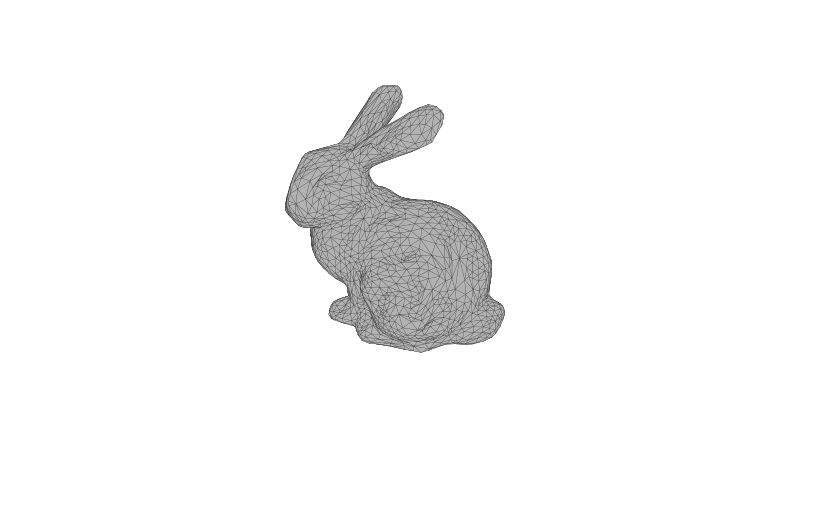

In [5]:
viewer = Viewer(800, 500)
viewer.lookat(3, 4, 5, 0, 0, 0, 0, 1, 0)
viewer.perspective(45, viewer.aspect, 1, 100)
viewer.mesh_visualization(mesh)

## Adjacent Lalpacian

In [6]:
L = get_mesh_laplacian(mesh, tms.MeshLaplace.ADJACENT)
invsqD = sp.sparse.diags(1.0 / np.sqrt(L.diagonal())) 
L = invsqD @ L @ invsqD

In [ ]:
# factorization
Lmax, Umax = sp.sparse.linalg.eigsh(L, k=5, which="LM")
Lmax, Umax = Lmax.real, Umax.real
Lmin, Umin = sp.sparse.linalg.eigsh(L, k=5, which="SM")
Lmin, Umin = Lmin.real, Umin.real

In [ ]:
umin = min(Umin.min(), Umax.min())
umax = max(Umin.max(), Umax.max())
print("umin={:f}, umax={:f}".format(umin, umax))

ordinal = lambda n: "%d%s" % (n,"tsnrhtdd"[(n//10%10!=1)*(n%10<4)*n%10::4])

for i in range(0, 5):
    u0 = Umin[:, i]
    u0 = (u0 - umin) / (umax - umin)
    u0 = np.clip((u0 - 0.5) * 4.0 + 0.5, 0.0, 1.0)
    colors = cm.coolwarm(u0)
    ordstr = ordinal(i + 1)
    title = f"{ordstr:s} min-eigenvalue: {Lmin[i]:f}"
    viewer.mesh_visualization(mesh, colors, title=title)

for i in range(0, 5):
    u0 = Umax[:, i]
    u0 = (u0 - umin) / (umax - umin)
    u0 = np.clip((u0 - 0.5) * 4.0 + 0.5, 0.0, 1.0)
    colors = cm.coolwarm(u0)
    ordstr = ordinal(i + 1)
    title = f"{ordstr:s} max-eigenvalue: {Lmax[i]:f}"
    viewer.mesh_visualization(mesh, colors, title=title)

## Cotangent Laplacian

In [ ]:
L = get_mesh_laplacian(mesh, tms.MeshLaplace.COTANGENT)
invsqD = sp.sparse.diags(1.0 / np.sqrt(L.diagonal())) 
L = invsqD @ L @ invsqD

In [ ]:
# factorization
Lmax, Umax = sp.sparse.linalg.eigsh(L, k=5, which="LM")
Lmax, Umax = Lmax.real, Umax.real
Lmin, Umin = sp.sparse.linalg.eigsh(L, k=5, which="SM")
Lmin, Umin = Lmin.real, Umin.real

In [ ]:
umin = min(Umin.min(), Umax.min())
umax = max(Umin.max(), Umax.max())
print("umin={:f}, umax={:f}".format(umin, umax))

ordinal = lambda n: "%d%s" % (n,"tsnrhtdd"[(n//10%10!=1)*(n%10<4)*n%10::4])

for i in range(0, 5):
    u0 = Umin[:, i]
    u0 = (u0 - umin) / (umax - umin)
    u0 = np.clip((u0 - 0.5) * 4.0 + 0.5, 0.0, 1.0)
    colors = cm.coolwarm(u0)
    ordstr = ordinal(i + 1)
    title = f"{ordstr:s} min-eigenvalue: {Lmin[i]:f}"
    viewer.mesh_visualization(mesh, colors, title=title)

for i in range(0, 5):
    u0 = Umax[:, i]
    u0 = (u0 - umin) / (umax - umin)
    u0 = np.clip((u0 - 0.5) * 4.0 + 0.5, 0.0, 1.0)
    colors = cm.coolwarm(u0)
    ordstr = ordinal(i + 1)
    title = f"{ordstr:s} max-eigenvalue: {Lmax[i]:f}"
    viewer.mesh_visualization(mesh, colors, title=title)

## Belkin et al. 2008

In [ ]:
L = get_mesh_laplacian(mesh, tms.MeshLaplace.BELKIN08)
invsqD = sp.sparse.diags(1.0 / np.sqrt(L.diagonal())) 
L = invsqD @ L @ invsqD

In [ ]:
# factorization
Lmax, Umax = sp.sparse.linalg.eigsh(L, k=5, which="LM")
Lmax, Umax = Lmax.real, Umax.real
Lmin, Umin = sp.sparse.linalg.eigsh(L, k=5, which="SM")
Lmin, Umin = Lmin.real, Umin.real

In [ ]:
umin = min(Umin.min(), Umax.min())
umax = max(Umin.max(), Umax.max())
print("umin={:f}, umax={:f}".format(umin, umax))

ordinal = lambda n: "%d%s" % (n,"tsnrhtdd"[(n//10%10!=1)*(n%10<4)*n%10::4])

for i in range(0, 5):
    u0 = Umin[:, i]
    u0 = (u0 - umin) / (umax - umin)
    u0 = np.clip((u0 - 0.5) * 4.0 + 0.5, 0.0, 1.0)
    colors = cm.coolwarm(u0)
    ordstr = ordinal(i + 1)
    title = f"{ordstr:s} min-eigenvalue: {Lmin[i]:f}"
    viewer.mesh_visualization(mesh, colors, title=title)

for i in range(0, 5):
    u0 = Umax[:, i]
    u0 = (u0 - umin) / (umax - umin)
    u0 = np.clip((u0 - 0.5) * 4.0 + 0.5, 0.0, 1.0)
    colors = cm.coolwarm(u0)
    ordstr = ordinal(i + 1)
    title = f"{ordstr:s} max-eigenvalue: {Lmax[i]:f}"
    viewer.mesh_visualization(mesh, colors, title=title)